In [1]:
import pandas as pd

In [2]:
pertussis_results = pd.read_csv("../results/Bpertussis_metanetx_conversion_results.csv")
pertussis_results

,model,reactions number,removed reactions,converted reactions,non-converted reactions,recall,precision,f1,true positives,false positives,false negatives,ratio,jaccard distance
0,merlin BLAST auto,1819,562,589,668,0.301948,0.478559,0.370272,279.0,304.0,645.0,0.917763,0.772801
1,merlin DIAMOND,1891,601,607,683,0.305195,0.469218,0.369836,282.0,319.0,642.0,0.884013,0.773130
2,merlin BLAST SamPleR,1813,560,591,662,0.305195,0.482051,0.373757,282.0,303.0,642.0,0.930693,0.770171
3,AuReMe,881,178,702,1,0.432314,0.572254,0.492537,396.0,296.0,520.0,1.337838,0.673267
4,autoKEGGrec,884,0,575,309,0.335498,0.545775,0.415550,310.0,258.0,614.0,1.201550,0.737733
5,CarveMe,2307,924,1375,8,0.530837,0.367378,0.434234,482.0,830.0,426.0,0.580723,0.722670
6,ModelSEED,1336,185,554,597,0.292605,0.493671,0.367429,273.0,280.0,660.0,0.975000,0.774938
7,PathwayTools,1334,35,379,920,0.252688,0.621693,0.359327,235.0,143.0,695.0,1.643357,0.780988
8,RAVEN,3577,0,1133,2444,0.367568,0.302491,0.331869,340.0,784.0,585.0,0.433673,0.801053
9,merlin BIT,1526,337,1157,32,0.512596,0.409807,0.455474,468.0,674.0,445.0,0.694362,0.705104


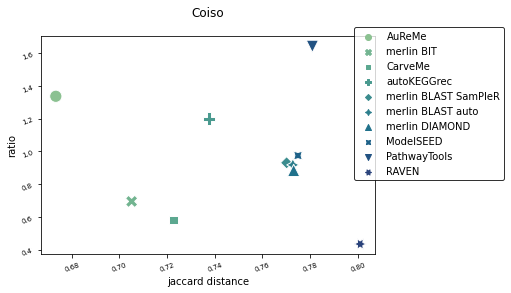

In [105]:
import matplotlib
import seaborn

matplotlib.pyplot.clf()
dotplot = seaborn.scatterplot(data=pertussis_results, x="jaccard distance", y="ratio", hue="model", style="model",
                              sizes=(50, 100), palette="crest", legend="full", s = 150)

dotplot.legend(loc='center right', bbox_to_anchor=(1.4, 0.69), facecolor="inherit", edgecolor="inherit", ncol=1,
               fontsize='medium')

dotplot.set_title("Coiso", pad=20)
dotplot.tick_params(axis='x', rotation=20, labelsize="x-small")
dotplot.tick_params(axis='y', rotation=20, labelsize="x-small")

#figure = fig.get_figure()
#figure = dotplot.get_figure()
#figure.savefig(output_path, dpi=1200, bbox_inches="tight")

In [99]:
legend = dotplot.legend(loc='center right', bbox_to_anchor=(1.4, 0.69), facecolor="inherit", edgecolor="inherit", ncol=1,
               fontsize='medium')

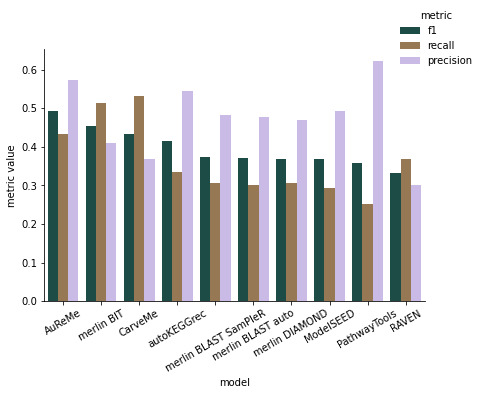

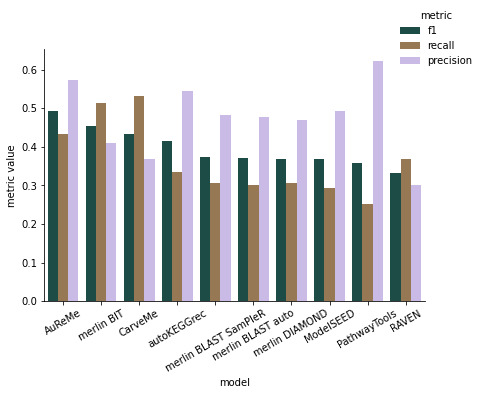

In [5]:
import matplotlib.pyplot as plt
from pandas import DataFrame

df = DataFrame(columns = ["model", "metric", "metric value"])
j=0
pertussis_results = pertussis_results.sort_values(by="f1", ascending=False)
for i, row in pertussis_results.iterrows():
    for metric in ["f1", "recall", "precision"]:

        df.at[j, "model"] = row["model"]
        df.at[j, "metric"] = metric
        df.at[j, "metric value"] = row[metric]

        j+=1

plot = seaborn.catplot(x='model', y='metric value', hue='metric', data=df, kind='bar', palette="cubehelix")
seaborn.move_legend(plot, "center right", bbox_to_anchor=(1.1, 1))
plot.set_xticklabels(rotation=30)
plot.fig.tight_layout()
figure = plot.fig.get_figure()
figure.savefig()

In [106]:
def generate_plots(results_path, x_var, y_var, figure_path):
    results = pd.read_csv(results_path)
    matplotlib.pyplot.clf()
    dotplot = seaborn.scatterplot(data=results, x=x_var, y=y_var, hue="model", style="model", s = 150,
                                  sizes=(50, 100), palette="crest", legend="full")
    dotplot.legend(loc='center right', bbox_to_anchor=(1.4, 0.69), facecolor="inherit", edgecolor="inherit", ncol=1,
               fontsize='small')

    dotplot.tick_params(axis='x', rotation=20, labelsize="x-small")
    dotplot.tick_params(axis='y', rotation=20, labelsize="x-small")
    figure = dotplot.get_figure()
    figure.savefig(figure_path, dpi=1200, bbox_inches="tight")

In [107]:
def generate_metrics_plots(results_path, figure_path):
    results = pd.read_csv(results_path)
    df = DataFrame(columns = ["model", "metric", "metric value"])
    j=0
    results = results.sort_values(by="f1", ascending=False)
    for i, row in results.iterrows():
        for metric in ["f1", "recall", "precision"]:

            df.at[j, "model"] = row["model"]
            df.at[j, "metric"] = metric
            df.at[j, "metric value"] = row[metric]

            j+=1

    plot = seaborn.catplot(x='model', y='metric value', hue='metric', data=df, kind='bar', palette="cubehelix")
    seaborn.move_legend(plot, "center right", bbox_to_anchor=(1.1, 1))
    plot.set_xticklabels(rotation=30)
    plot.fig.tight_layout()
    figure = plot.fig.get_figure()
    figure.savefig(figure_path, dpi=1200, bbox_inches="tight")

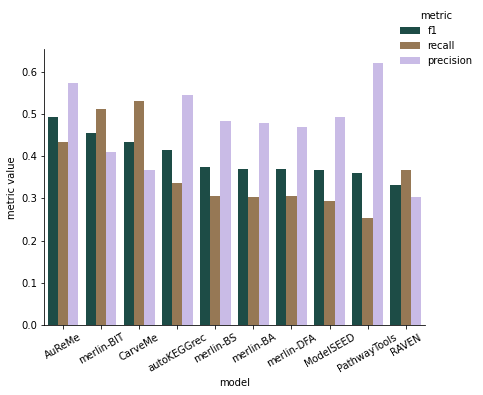

In [108]:
generate_metrics_plots("../results/Bpertussis/Bpertussis_metanetx_conversion_results.csv", "../results/Bpertussis/reactions_bar_plot.png")

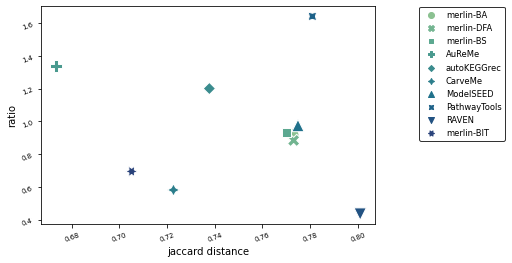

In [110]:
generate_plots("../results/Bpertussis/Bpertussis_metanetx_conversion_results.csv",
               "jaccard distance", "ratio", "../results/Bpertussis/reactions_dot_plot.png")

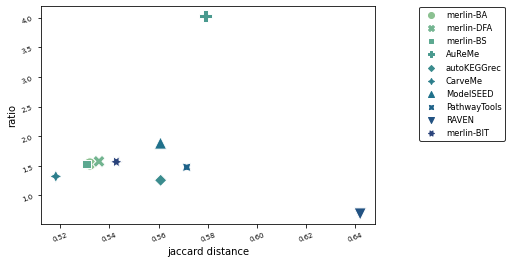

In [111]:
generate_plots("../results/Bpertussis/Bpertussis_genes_results.csv", "jaccard distance", "ratio", "../results/Bpertussis/gene_dot_plot.png")

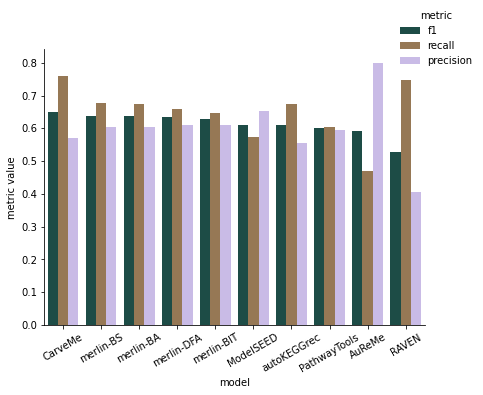

In [112]:
generate_metrics_plots("../results/Bpertussis/Bpertussis_genes_results.csv", "../results/Bpertussis/gene_bar_plot.png")

# L. plantarum results

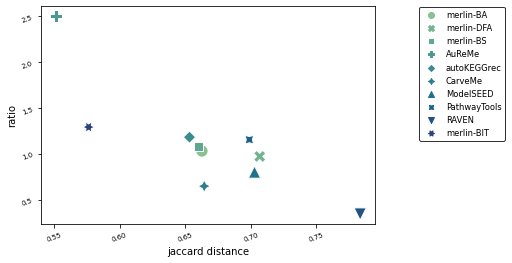

In [113]:
generate_plots("../results/Lplantarum/Lplantarum_metanetx_conversion_results.csv",
               "jaccard distance", "ratio", "../results/Lplantarum/reactions_dot_plot.png")

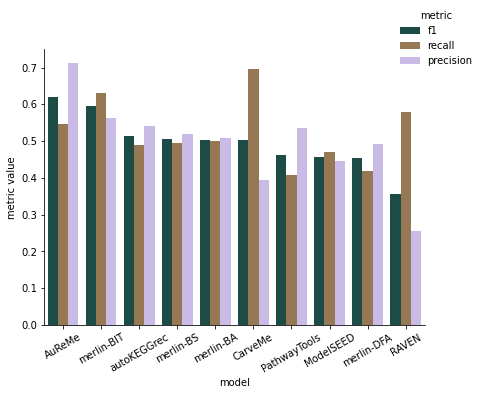

In [114]:
generate_metrics_plots("../results/Lplantarum/Lplantarum_metanetx_conversion_results.csv", "../results/Lplantarum/reactions_bar_plot.png")

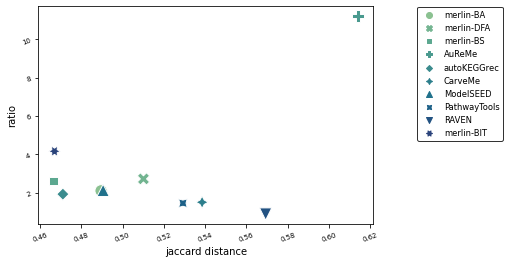

In [115]:
generate_plots("../results/Lplantarum/Lplantarum_genes_results.csv", "jaccard distance", "ratio", "../results/Lplantarum/genes_dot_plot.png")

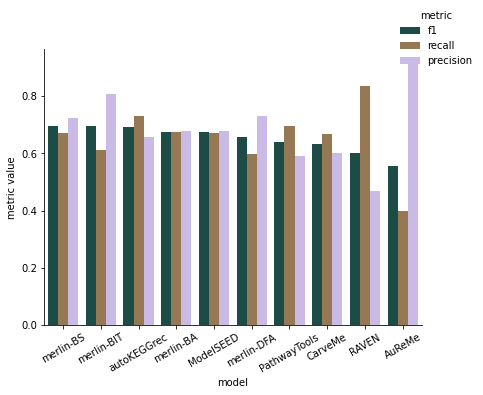

In [116]:
generate_metrics_plots("../results/Lplantarum/Lplantarum_genes_results.csv", "../results/Lplantarum/genes_bar_plot.png")

# T. gondii results

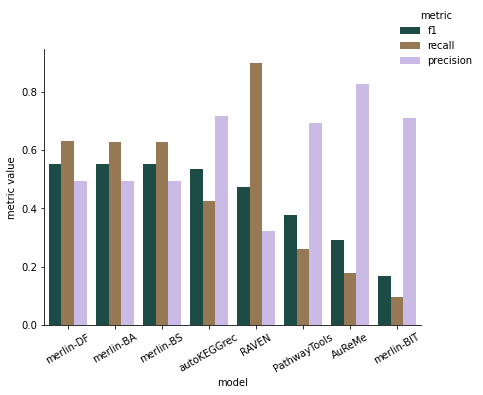

In [117]:
generate_metrics_plots("../results/Tgondii/Tgondii_metanetx_conversion_results.csv",
                       "../results/Tgondii/reactions_bar_plot.png")

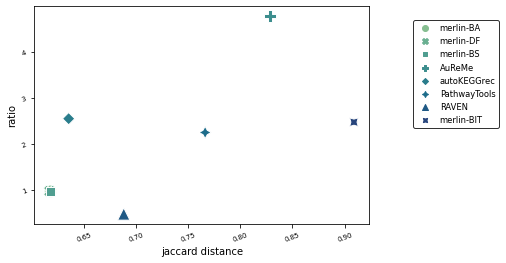

In [118]:
generate_plots("../results/Tgondii/Tgondii_metanetx_conversion_results.csv", "jaccard distance", "ratio", "../results/Tgondii/reactions_dot_plot.png")

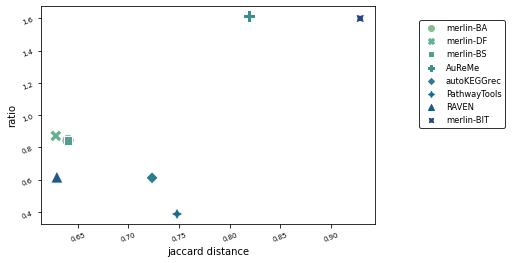

In [119]:
generate_plots("../results/Tgondii/Tgondii_genes_results.csv", "jaccard distance", "ratio", "../results/Tgondii/genes_dot_plot.png")

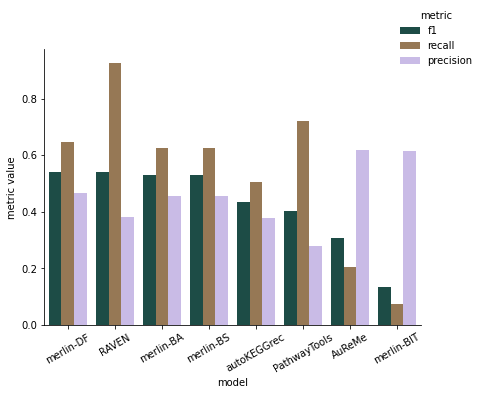

In [120]:
generate_metrics_plots("../results/Tgondii/Tgondii_genes_results.csv",
                       "../results/Tgondii/genes_bar_plot.png")